# Лабораторная работа №1 
## Логистическая регрессия в качестве нейронной сети
          	

### <a href="http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html">Данные</a>
<a href="https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz">LARGE</a>
<a href="https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz">SMALL</a>

В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.



### Задания
- [x] Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;
- [x] Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).
- [x] Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);
- [x] Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.
- [x] Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

In [1]:
import logging

logging.basicConfig(
    format='[%(asctime)s][%(name)s][%(levelname)s]\n%(message)s\n',
    level='INFO',
)

In [ ]:
%%time


from common import Dataset

# Initial data
dataset = {
    'small': 'https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz',
    'large': 'https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz',
}

# Create Datasets
ds_small = Dataset.load(name='notMNIST_small', url=dataset['small'])
ds_large = Dataset.load(name='notMNIST_large', url=dataset['large'])

[2020-05-16 15:54:18,949][root][INFO]
Download complete: /Users/vadimdenisov/Projects/bsuir/mag_2/ml-nn-labs/data/notMNIST_small.tar.gz

[2020-05-16 15:54:18,950][root][INFO]
Extract copmlete: /Users/vadimdenisov/Projects/bsuir/mag_2/ml-nn-labs/data

[2020-05-16 15:54:20,047][root][WARNING]
/Users/vadimdenisov/Projects/bsuir/mag_2/ml-nn-labs/data/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png: Could not find a format to read the specified file in single-image mode

[2020-05-16 15:54:27,845][root][WARNING]
/Users/vadimdenisov/Projects/bsuir/mag_2/ml-nn-labs/data/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png: Could not find a format to read the specified file in single-image mode

[2020-05-16 15:54:34,897][root][INFO]
Download complete: /Users/vadimdenisov/Projects/bsuir/mag_2/ml-nn-labs/data/notMNIST_large.tar.gz

[2020-05-16 15:54:34,898][root][INFO]
Extract from /Users/vadimdenisov/Projects/bsuir/mag_2/ml-nn-labs/data/notMNIST_large.tar.gz

[2020-05-16 1

CPU times: user 283 ms, sys: 4.23 ms, total: 287 ms
Wall time: 380 ms


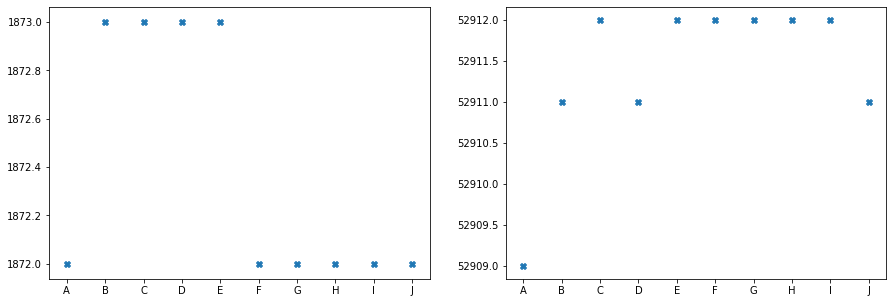

In [4]:
%%time

import numpy as np
import matplotlib.pyplot as plt


def plot_data_count(dataset: Dataset, ax):
    labels = set(dataset.Y.flatten())
    x = [np.sum(dataset.Y == label) for label in sorted(labels)]
    ax.scatter(sorted(labels), x, marker='X')

    
_, axs = plt.subplots(1, 2, figsize=(15, 5))
datasets = [
    ds_small, 
    ds_large
]
for ax, ds in zip(axs, datasets):
    plot_data_count(ds, ax)

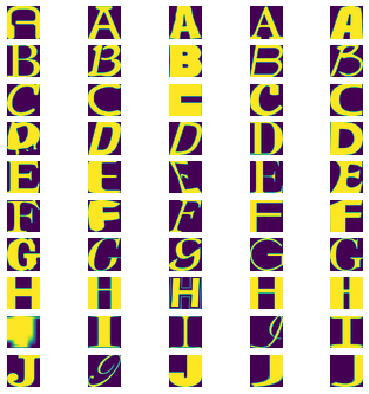

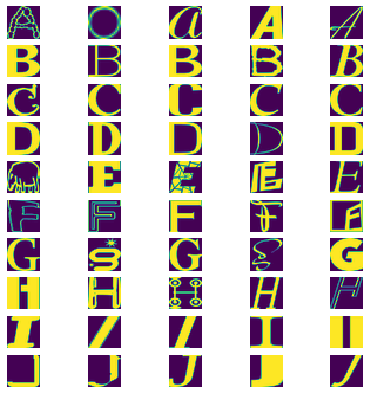

In [5]:
import matplotlib.pyplot as plt
import random 


def plot_rand(dataset: Dataset):
    nrow, ncol = 10, 5
    _, axs = plt.subplots(nrow, ncol, figsize=(7, 7))
    
    labels = set(dataset.Y.flatten())
    for i, label in enumerate(sorted(labels)):
        x = dataset.X[dataset.Y.flatten() == label]
        x_rand = random.choices(x, k=ncol)

        for j, img_rand in enumerate(x_rand):
            ax = axs[i][j]
            ax.axis('off')
            ax.imshow(img_rand)


datasets = [ ds_small, ds_large ]
for ds in datasets:
    plot_rand(ds)

In [74]:
%%time

import hashlib
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def model_train(x_train, y_train, **kwargs):
    return LogisticRegression(**kwargs).fit(x_train, y_train.flatten())


def train_validation_split(x, y, train_size, validation_size):
    return train_test_split(x, y, train_size=train_size, test_size=validation_size) 


def drop_duplicate(x):
    x_md5 = np.array([hashlib.md5(xi).hexdigest() for xi in x])
    df = pd.DataFrame(x_md5).drop_duplicates()
    return df.index.values

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 15.7 µs


In [79]:
%%time

import numpy as np
from sklearn import preprocessing


# Get flat X, Y 
X = ds_large.X
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
Y = ds_large.Y

# Drop dublicates from dataset
idx = drop_duplicate(X)
X = X[idx]
Y = Y[idx]

# Split X, Y to train, validation 
N_train, N_valid = 200000, 10000
X_train, X_valid, Y_train, Y_valid = train_validation_split(X, Y, train_size=N_train, validation_size=N_valid)

# Get test X, Y
X_test = ds_small.X
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
Y_test = ds_small.Y

# Scale X
X_train = preprocessing.scale(X_train)
X_valid = preprocessing.scale(X_valid)
X_test = preprocessing.scale(X_test)

CPU times: user 2.57 s, sys: 634 ms, total: 3.2 s
Wall time: 3.21 s


In [80]:
%%time

# Train model
sizes = [50, 100, 1000, 10_000, 50_000, 100_000]
score = []
C_values = [1e-6, 1e-3, 1, 2, 16, 64, 128]

x_valid = X_valid
y_valid = Y_valid
    
x_test = X_test
y_test = Y_test


for train_size in sizes:
    x_train = X_train[:train_size]
    y_train = Y_train[:train_size]
    
    # Train
    models = [ model_train(x_train, y_train, C=C, max_iter=5000) for C in C_values ]

    # Validate
    validate_scores = np.array([ model.score(x_valid, y_valid) for model in models ])
    better_model_idx = validate_scores.argmax()
    better_model = models[better_model_idx]

    # Test
    score.append( better_model.score(x_test, y_test) )
    print('=' * 32)
    print(f'Train size: {train_size}')
    print(f'Validation score: {validate_scores[better_model_idx]}')
    print(f'Test score: {score[-1]}')

Train size: 50
Validation score: 0.5551
Test score: 0.5942640461439863
Train size: 100
Validation score: 0.6934
Test score: 0.7566225165562914
Train size: 1000
Validation score: 0.7874
Test score: 0.8521149327066866
Train size: 10000
Validation score: 0.8219
Test score: 0.8865627002777184
Train size: 50000
Validation score: 0.8317
Test score: 0.8946272164067507
Train size: 100000
Validation score: 0.8337
Test score: 0.8970839564195685
CPU times: user 2h 8min 15s, sys: 1min 37s, total: 2h 9min 52s
Wall time: 30min 20s


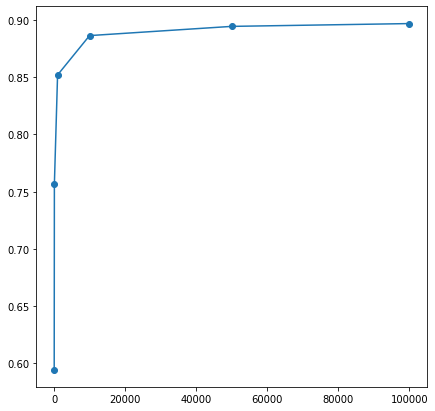

In [81]:
_, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(sizes, score, marker='o')